In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
# import scipy.stats as sp

In [3]:
df = pd.read_csv('stroopdata.csv')

df['diff']  = df['Incongruent'] - df['Congruent']

df.head()

,Congruent,Incongruent,diff
0,12.079,19.278,7.199
1,16.791,18.741,1.950
2,9.564,21.214,11.650
3,8.630,15.687,7.057
4,14.669,22.803,8.134


The experiment takes participants with two test, congruent task and incongruent task. Congruent task is word with agreeing text and font color, while incongruent is a different text and its font color. Both of the task require the participants to say it out loud the word that are being display, and press 'Finish' button to see which time do they take. The control group is the congruent task, while experiment group is ingconruent task.

The independent variables is which makes differ between congruent task and incongruent task. ***That is words that are being displayed***. Participants are requested to say the font color of the words, which is the same for both control and experiment group. But while text displayed agree with color in congruent, incongruent is the other way around.

***The dependent variables is time participants take to complete the task***. The time is depend on whether the text agree with the font color being displayed. We can see that from the data, on average, the time participants took for incongruent task is different than when they solve congruent task. We will use statistical test to test whether the time is significantly different.

So what kind of paired data should we be asking? We know that in general Incongruent task take longer than Congruent task. So in Confidence Interval, we could be asking the interval in which Ingrouent takes more second than congruent, and in hypothesis we could be asking is whether the incongruent task results in significantly different than congruent task.

Our sample size is less than 30, and that would means that our sampling distribution won't be normal. We're faced with two conditions, using t-test or bootstrapping. In this case, We will be using t-test. And since this is an experiment (assumed random assignment), we can draw causation. 

In the instructions, it doesn't stated anywhere how the participants are collected. There might be a convenience bias(only participants that know the experiment), location bias(city/country where the experiment performed ), or voluntarily bias. Assumed participants randomly sampled without any bias at all. The result of this experiment can be generalized to world population.

We design the hypothesis test as follows:



H0: $ \mu_\mathbf{congruent} = \mu_\mathbf{incongruent}$ The time took for population to solve both congruent task and incongruent task is the same, on average

HA:$\mu_\mathbf{congruent} \neq \mu_\mathbf{incongruent}$ The time took for population to solve both congruent task and incongruent task is different, on average

We're going to use **two-sided** t-statistics. This is an experiment where we have limited data and samples, and we want to test our hypothesis to the population parameters.

In [28]:
df.describe()

,Congruent,Incongruent,diff
count,24.000000,24.000000,24.000000
mean,14.051125,22.015917,7.964792
std,3.559358,4.797057,4.864827
min,8.630000,15.687000,1.950000
25%,11.895250,18.716750,3.645500
50%,14.356500,21.017500,7.666500
75%,16.200750,24.051500,10.258500
max,22.328000,35.255000,21.919000


The measure of tendency that will be used in this situation is mean, and measure of variability is standard deviation.

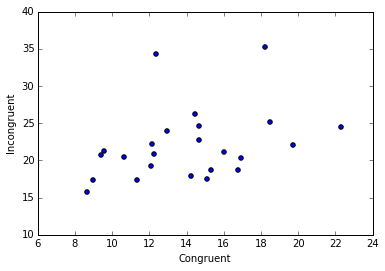

In [9]:
df.plot.scatter(x='Congruent',y='Incongruent');

The plot shown a moderaly weak correlation between congruent variable and incongruent variable.

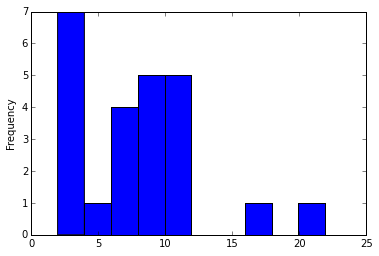

In [12]:
(df.Incongruent - df.Congruent).plot.hist();

We can see that is the difference is right skewed distribution. This makes sense, since congruent task is easier, there shouldn't be any participants that solve incongruent task shorter tha congruent task. And it should be the longer time it took for the participants at solving incongruent task, the less should be for the number of participants. 

In [20]:
%load_ext rpy2.ipython

## Hypothesis Testing

In [75]:
%%R

n = 24
mu = 7.964792
s = 4.864827
CL = 0.95
n = 24
# z = round(qnorm((1-CL)/2, lower.tail=F),digits=2)
SE = s/sqrt(n)
t = mu/SE
t_crit = round(qt((1-CL)/2,df=n-1),digits=3)
c(t,c(-t_crit,t_crit))

[1]  8.020707  2.069000 -2.069000


Since our t-statistics, 8.02 is higher than the t critical values, we can conclude that the data provides convincing evidence that the time participants took for incongruent task is significantly different than when they took congruent task.

## Confidence Interval

In [55]:
%%R

ME = t*SE
c(mu+ME,mu-ME)

[1]  5.910216 10.019368


So we are 95% confident that participants on average, took incongruent task 5.91 to 10.02 seconds longer than congruent task. Since this is an experimental design, we can draw causation intead of correlation.

> ***REFERENCES***:
> * http://napitupulu-jon.appspot.com/posts/paired-data-coursera-statistics.html
> * http://napitupulu-jon.appspot.com/posts/inference-means-anova.html
> * https://www.udacity.com/course/viewer#!/c-ud134-nd/l-4578095863/e-147019342/m-147300501